In [1]:
import Bio as Bio
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo

In [4]:
# import 16s sequences for each bacterial strain
b1 = SeqIO.read("p_mirabilis_sequence.fasta", "fasta")
b2 = SeqIO.read("p_acidifaciens_sequence.fasta", "fasta")
b3 = SeqIO.read("r_palustris_sequence.fasta", "fasta")
b4 = SeqIO.read("c_metallidurans_sequence.fasta", "fasta")
b5 = SeqIO.read("r_pickettii_sequence.fasta", "fasta")
b6 = SeqIO.read("a_hydrophila_sequence.fasta", "fasta")
b7 = SeqIO.read("e_cloacae_sequence.fasta", "fasta")
b8 = SeqIO.read("a_tumefaciens_sequence.fasta", "fasta")
b9 = SeqIO.read("a_piechaudii_sequence.fasta", "fasta")
b10 = SeqIO.read("s_marcescens_sequence.fasta", "fasta")
b11 = SeqIO.read("r_aquatilis_sequence.fasta", "fasta")
b12 = SeqIO.read("p_agglomerans_sequence.fasta", "fasta")

In [21]:
# import 18s sequences for each fungal strain
f1 = SeqIO.read("t_harzianum_sequence.fasta", "fasta")
f2 = SeqIO.read("a_nidulans_sequence.fasta", "fasta")
f3 = SeqIO.read("I_scottii_sequence.fasta", "fasta")
f4 = SeqIO.read("y_lipolytica_sequence.fasta", "fasta")
f5 = SeqIO.read("c_dubliniensis_sequence.fasta", "fasta")
f6 = SeqIO.read("m_caribbica_sequence.fasta", "fasta")
f7 = SeqIO.read("p_kudriavzevii_sequence.fasta", "fasta")

In [5]:
# rename bacterial sequence data
b1.id = 'Proteus Mirabilis'
b2.id = 'Propionibacterium Acidifaciens'
b3.id = 'Rhodopseudomonas palustris'
b4.id = 'Cupriavidus Metallidurans'
b5.id = 'Ralstonia Pickettii'
b6.id = 'Aeromonas hydrophila'
b7.id = 'Enterobacter Cloacae'
b8.id = 'Agrobacterium Tumefaciens'
b9.id = 'Achromobacter Piechaudii'
b10.id = 'Serratia Marcescens'
b11.id = 'Rahnella Aquatilis'
b12.id = 'Pantoea Agglomerans'

In [22]:
# rename fungal sequence data
f1.id = 'Trichoderma Harzianum'
f2.id = 'Aspergillus Nidulans'
f3.id = 'Leucosporidium Scottii'
f4.id = 'Yarrowia Lipolytica'
f5.id = 'Candida Dubliniensis'
f6.id = 'Meyerozyma Caribbica'
f7.id = 'Pichia Kudriavzevii'

In [6]:
# combine each bacterial sequence into an indivdiual file for alignment
bacteria = SeqIO.write([b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12], "bacteria.fasta", "fasta")

In [23]:
# combine each fungal sequence into an indivdual file for sequence alignment
fungi = SeqIO.write([f1,f2,f3,f4,f5,f6,f7], "fungi.fasta", "fasta")

In [24]:
with open("fungi-alignment.clw", "r") as aln:
    fungal_alignment = AlignIO.read(aln, "clustal")
print(type(fungal_alignment))

<class 'Bio.Align.MultipleSeqAlignment'>


In [10]:
with open("bacterial-alignment.clw", "r") as aln:
    alignment = AlignIO.read(aln, "clustal")
print(type(alignment))

<class 'Bio.Align.MultipleSeqAlignment'>


In [11]:
# open and initiate the distance calculator using identity model
from Bio.Phylo.TreeConstruction import DistanceCalculator
calculator = DistanceCalculator('identity')
# write the distance matrix (calculate distance between each bacterial species)
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)

Propionibacterium   0.000000
Rhodopseudomonas    0.265685    0.000000
Agrobacterium   0.259923    0.149168    0.000000
Aeromonas   0.275928    0.236236    0.248399    0.000000
Proteus 0.265685    0.270166    0.245839    0.128681    0.000000
Rahnella    0.701024    0.699744    0.661332    0.649808    0.622919    0.000000
Pantoea 0.311780    0.307298    0.270166    0.196543    0.132522    0.536492    0.000000
Serratia    0.489117    0.496799    0.464149    0.387964    0.352113    0.309219    0.362356    0.000000
Enterobacter    0.624200    0.621639    0.587708    0.602433    0.571063    0.545455    0.482714    0.448143    0.000000
Achromobacter   0.359155    0.340589    0.310499    0.288732    0.281690    0.549936    0.268246    0.350192    0.510883    0.000000
Cupriavidus 0.277849    0.247759    0.252241    0.201665    0.207426    0.652369    0.248399    0.435339    0.619078    0.216389    0.000000
Ralstonia   0.296415    0.254802    0.238796    0.199104    0.199744    0.645327    0.240

In [26]:
# calculate distance for fungal species
distance_matrix = calculator.get_distance(fungal_alignment)
print(distance_matrix)

Leucosporidium  0.000000
Yarrowia    0.285555    0.000000
Pichia  0.216955    0.199108    0.000000
Candida 0.412716    0.490240    0.395427    0.000000
Meyerozyma  0.188511    0.201896    0.113218    0.373118    0.000000
Trichoderma 0.456219    0.560513    0.480201    0.184049    0.459565    0.000000
Aspergillus 0.190742    0.208589    0.145008    0.414389    0.136085    0.442276    0.000000
    Leucosporidium  Yarrowia    Pichia  Candida Meyerozyma  Trichoderma Aspergillus


In [12]:
# Open and Initiate Tree Construction
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)
# Build the tree (bacteria)
bacteria_tree = constructor.build_tree(alignment)
bacteria_tree.rooted = True
print(bacteria_tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner10')
        Clade(branch_length=0.007642445582586421, name='Inner9')
            Clade(branch_length=0.03410091229193341, name='Inner6')
                Clade(branch_length=0.14424215749039693, name='Propionibacterium')
                Clade(branch_length=0.043978072983354655, name='Inner3')
                    Clade(branch_length=0.06637123879641485, name='Agrobacterium')
                    Clade(branch_length=0.08279649487836113, name='Rhodopseudomonas')
            Clade(branch_length=0.02327744878361076, name='Inner8')
                Clade(branch_length=0.016225192061459684, name='Inner7')
                    Clade(branch_length=0.07983554737516008, name='Pantoea')
                    Clade(branch_length=0.05268685979513443, name='Proteus')
                Clade(branch_length=0.08012564020486555, name='Aeromonas')
        Clade(branch_length=0.05569782330345713, name='Inner5')
            Clade(branch_length=0.1066874733247

In [27]:
# Build the tree (fungi)
fungal_tree = constructor.build_tree(fungal_alignment)
fungal_tree.rooted = True
print(fungal_tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner5')
        Clade(branch_length=0.011886503067484663, name='Inner3')
            Clade(branch_length=0.06383621490983456, name='Aspergillus')
            Clade(branch_length=0.028467187209518532, name='Inner2')
                Clade(branch_length=0.24097183491355267, name='Inner1')
                    Clade(branch_length=0.12331288343558283, name='Trichoderma')
                    Clade(branch_length=0.06073619631901844, name='Candida')
                Clade(branch_length=0.10147099832682654, name='Leucosporidium')
        Clade(branch_length=0.005402955939765794, name='Inner4')
            Clade(branch_length=0.059676519799219174, name='Pichia')
            Clade(branch_length=0.13943112102621302, name='Yarrowia')
        Clade(branch_length=0.05260039040713883, name='Meyerozyma')


In [13]:
# save bacterial tree to a new file
Phylo.write(bacteria_tree, "bacteria_tree.xml", "phyloxml")

1

In [28]:
# save fungal tree to a new file
Phylo.write(fungal_tree, "fungal_tree.xml", "phyloxml")

1

In [ ]:
# Use matplotlib to create a basic tree
import matplotlib
import matplotlib.pyplot as plt
bacteria_tree_fig = Phylo.draw(bacteria_tree)

In [ ]:
# manually edit tree with matplot lib to be more readable
fig = plt.figure(figsize=(18, 7), dpi=100)
matplotlib.rc('font', size=14)
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)
# modify tree ladder size
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(bacteria_tree, axes=axes)
fig.savefig("bacteria_cladogram")

In [ ]:
# create fungal tree plot with matplotlib
fig = plt.figure(figsize=(13, 5), dpi=100)
matplotlib.rc('font', size=12)
matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)
# modify tree ladder size
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(fungal_tree, axes=axes)
fig.savefig("fungal_cladogram")

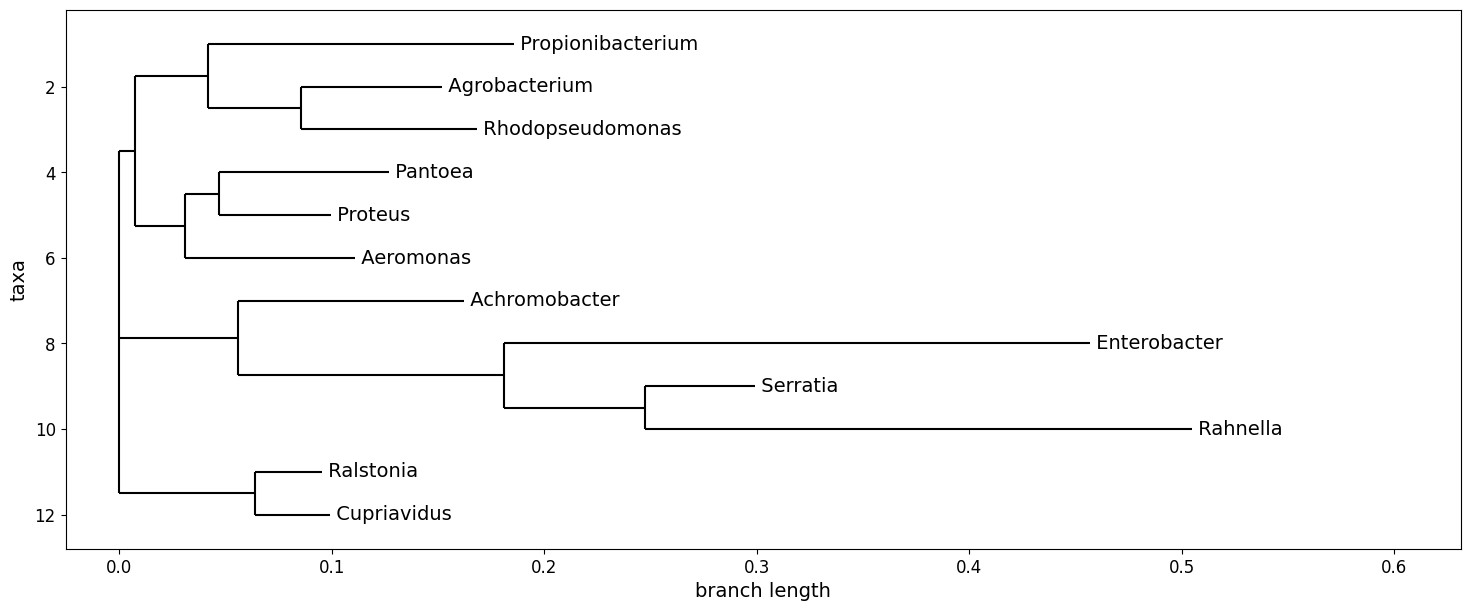

In [18]:
# remove inner labels from figure
bacteria_tree_edits = Phylo.read("bacteria_tree_edits.xml", "phyloxml")

fig = plt.figure(figsize=(18, 7), dpi=100)
matplotlib.rc('font', size=14)
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)
axes=fig.add_subplot(1, 1, 1)
Phylo.draw(bacteria_tree_edits, axes=axes)
fig.savefig("bacteria2_cladogram")

The above figure was created using 16s gene sequence data from 12 different bacterial strains - As shown from the figure, the branch lengths of enterobacter and rahnella indicates that those species possess the biggest degree of genetic change from their root ancestor (approx. 0.475 to 0.5 nucleotide substitutions per site). On the other hand, both Ralstonia and Cupriavidus possess the smallest branch lengths, indicating the least amount of genetic change from their root ancestor (approx. 0.1 nucleotide substitions per site). 

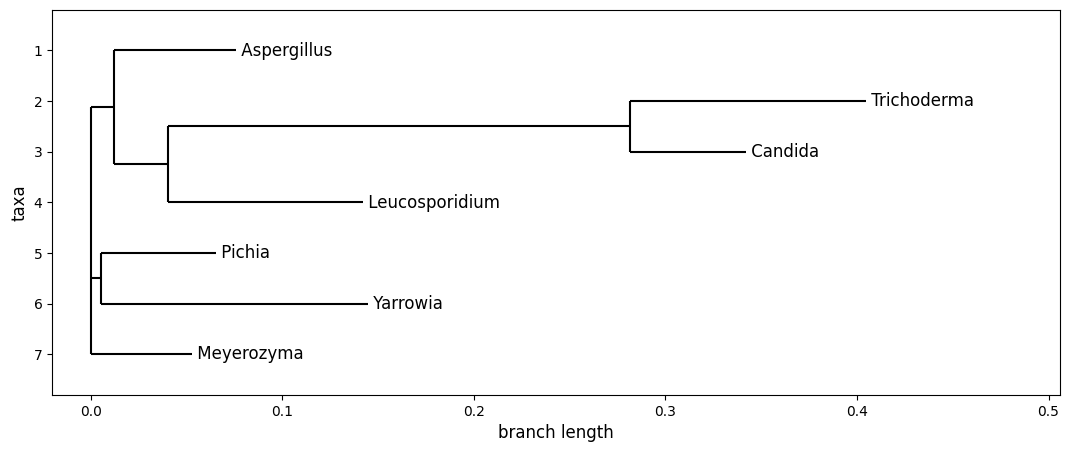

In [30]:
# remove inner labels from figure
fungal_tree_edits = Phylo.read("fungal_tree_edits.xml", "phyloxml")

fig = plt.figure(figsize=(13, 5), dpi=100)
matplotlib.rc('font', size=12)
matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)
axes=fig.add_subplot(1, 1, 1)
Phylo.draw(fungal_tree_edits, axes=axes)
fig.savefig("fungal2_cladogram")

The above figure was created using 18s sequencing data from 7 different fungal strains. As shown from the figure, the branch lengths of Trichoderma and Candida indicate the greatest degree of genetic change as compared to other species (about 0.4 nucleotide substiutions per site). Pichia and Meyerozyma have the shortest branch lengths, indicating the least amount of genetic change from the root ancestor (about 0.05 - 0.075 nucleotide substitutions per site). 